
<a id="T_838ECBC6"></a>

# <span style="color:rgb(213,80,0)">Explore and Analyze Tornadoes</span>

Welcome to your first live script. This script gives you the opportunity to visualize a large dataset and explore its contents. Follow the instructions provided in each section and complete the interactions. As you progress through the course, you'll learn how to implement the various pieces yourself.


Throughout this course you'll be working with historical data from storm events in the United States. The files include over 40 different types of storm events, and contain information such as geographic location, date, damage cost in dollars, injuries, deaths, and text descriptions of the storm.


There is a lot of missing data. For example, many events affect a large area, so no specific location is provided. As you explore the data, you'll see these represented as **`NaN`**, which stands for "not a number." Dealing with missing data is an important skill covered later, so don't worry about NaN entries for now.


This script explores the tornado events of 2013. There are many tornadoes in the data set. Nearly all tornado events have information for the location and damage associated with them. This makes tornadoes a great place to start.

<!-- Begin Toc -->

## Table of Contents
&emsp;[Part 0: Setup the environment](#TMP_511b)

&emsp;[Part 1: Import the Data](#H_AEF29358)

&emsp;&emsp;&emsp;[Data processing steps](#H_068DF7E2)

&emsp;[Part 2: Visualize the Locations of Tornadoes](#H_ED73F793)

&emsp;&emsp;[Plot all tornados above a damage threshold](#H_7746C5B7)

&emsp;&emsp;[Plot tornadoes for a given month](#H_99E00D65)

&emsp;[Part 3: Calculate Group Summary Statistics](#H_2FB427B5)

&emsp;&emsp;[Create a histogram of tornado events](#H_029963C7)

&emsp;&emsp;[Total damage by month](#H_59976D16)

&emsp;[Closing Remarks](#H_74316A4C)

<!-- End Toc -->
<a id="TMP_511b"></a>

## Part 0: Setup the environment

In [1]:
setupExploratoryDataAnalysis

Extracting "StormEvents.zip"...Setting up path...Done
All setup tasks completed.


<a id="H_AEF29358"></a>

## Part 1: Import the Data
<a id="H_F338C6D8"></a>

This section imports the data using a function generated by the Import Tool. You'll learn how to do this Module 2.

1.  Click in this section to make it the active section.
2. In the **Live Editor** tab click **Run Section**.
3. Explore the table to get a feel for the contents. Click on a variable to preview the contents. The table contains many columns, so scroll horizontally to see all the data.
4. Click on the `Begin_Date_Time` variable. Select "Sort Oldest to Newest" to order the events chronologically.
5. Click on the "Update Code" button and run the section again.

In [2]:
events = importStormData("StormEvents_2013.csv")
events = sortrows(events, "Begin_Date_Time")

<a id="H_068DF7E2"></a>

#### Data processing steps
<a id="H_201C1707"></a>

As you explore new data, you'll typically discover there is some "clean\-up" to perform. You won't know this in advance. So, while it looks like the first thing you do is clean the data, that comes after some initial exploration. You'll learn more about the steps below in Modules 3 and 4.

1.  Click **Run Section** to perform the preprocessing steps and move to the next section.

In [3]:
% Put months in correct order
monthOrder = ["January", "February", "March", "April", "May", "June", "July",...
    "August", "September", "October", "November", "December"];
events.Month = reordercats(events.Month, monthOrder);
% Set missing Property and Crop Cost to $0
events.Property_Cost(ismissing(events.Property_Cost)) = 0;
events.Crop_Cost(ismissing(events.Crop_Cost)) = 0;
% Add total damage to the table
events.Total_Damage = events.Property_Cost + events.Crop_Cost;


**Description of code above**

-  By default, the text in the "Month" variable of the table is ordered alphabetically. The code reorders the categories to match the calendar. This is not necessary but makes the visualizations easier to interpret.
-  Some events are missing information on the associated property and/or damage caused to property and crops. Missing cost is replaced with 0 as missing information likely means small or no damage to report.
-  A new variable named  `Total_Damage` is added to the table. This variable is the sum of `Property_Cost + Crop_Cost`.
<a id="H_ED73F793"></a>

## Part 2: Visualize the Locations of Tornadoes
<a id="H_7746C5B7"></a>

### Plot all tornados above a damage threshold

The code below creates a plot of tornado locations on a map. The size of the markers represents the cost in dollars of the damage caused by the tornado. The slider sets a minimum value for total damage of an event to be included in the plot.

1.  Click into this section to make it the active section.
2. Click **Run Section** to visualize the results.
3. Click on the map to make the figure active.
4. Above the map Plus (+), Minus (-), and Home icons appear. Click the Plus icon to zoom in.
5. Zoom in further and/or pan on the map by clicking the mouse and dragging the map.
6. Click the Home icon to reset the view.
7. Set a threshold for damage caused by adjusting the slider.
<a id="H_2CF16EA4"></a>

In [4]:
minDamage = 440000;


There is no need to edit the code below. In Modules 3 and 4 you'll learn how to create visualizations and select subsets of data. Then in Module 5 you'll learn how to add an interactive control to interactively modify variable values.



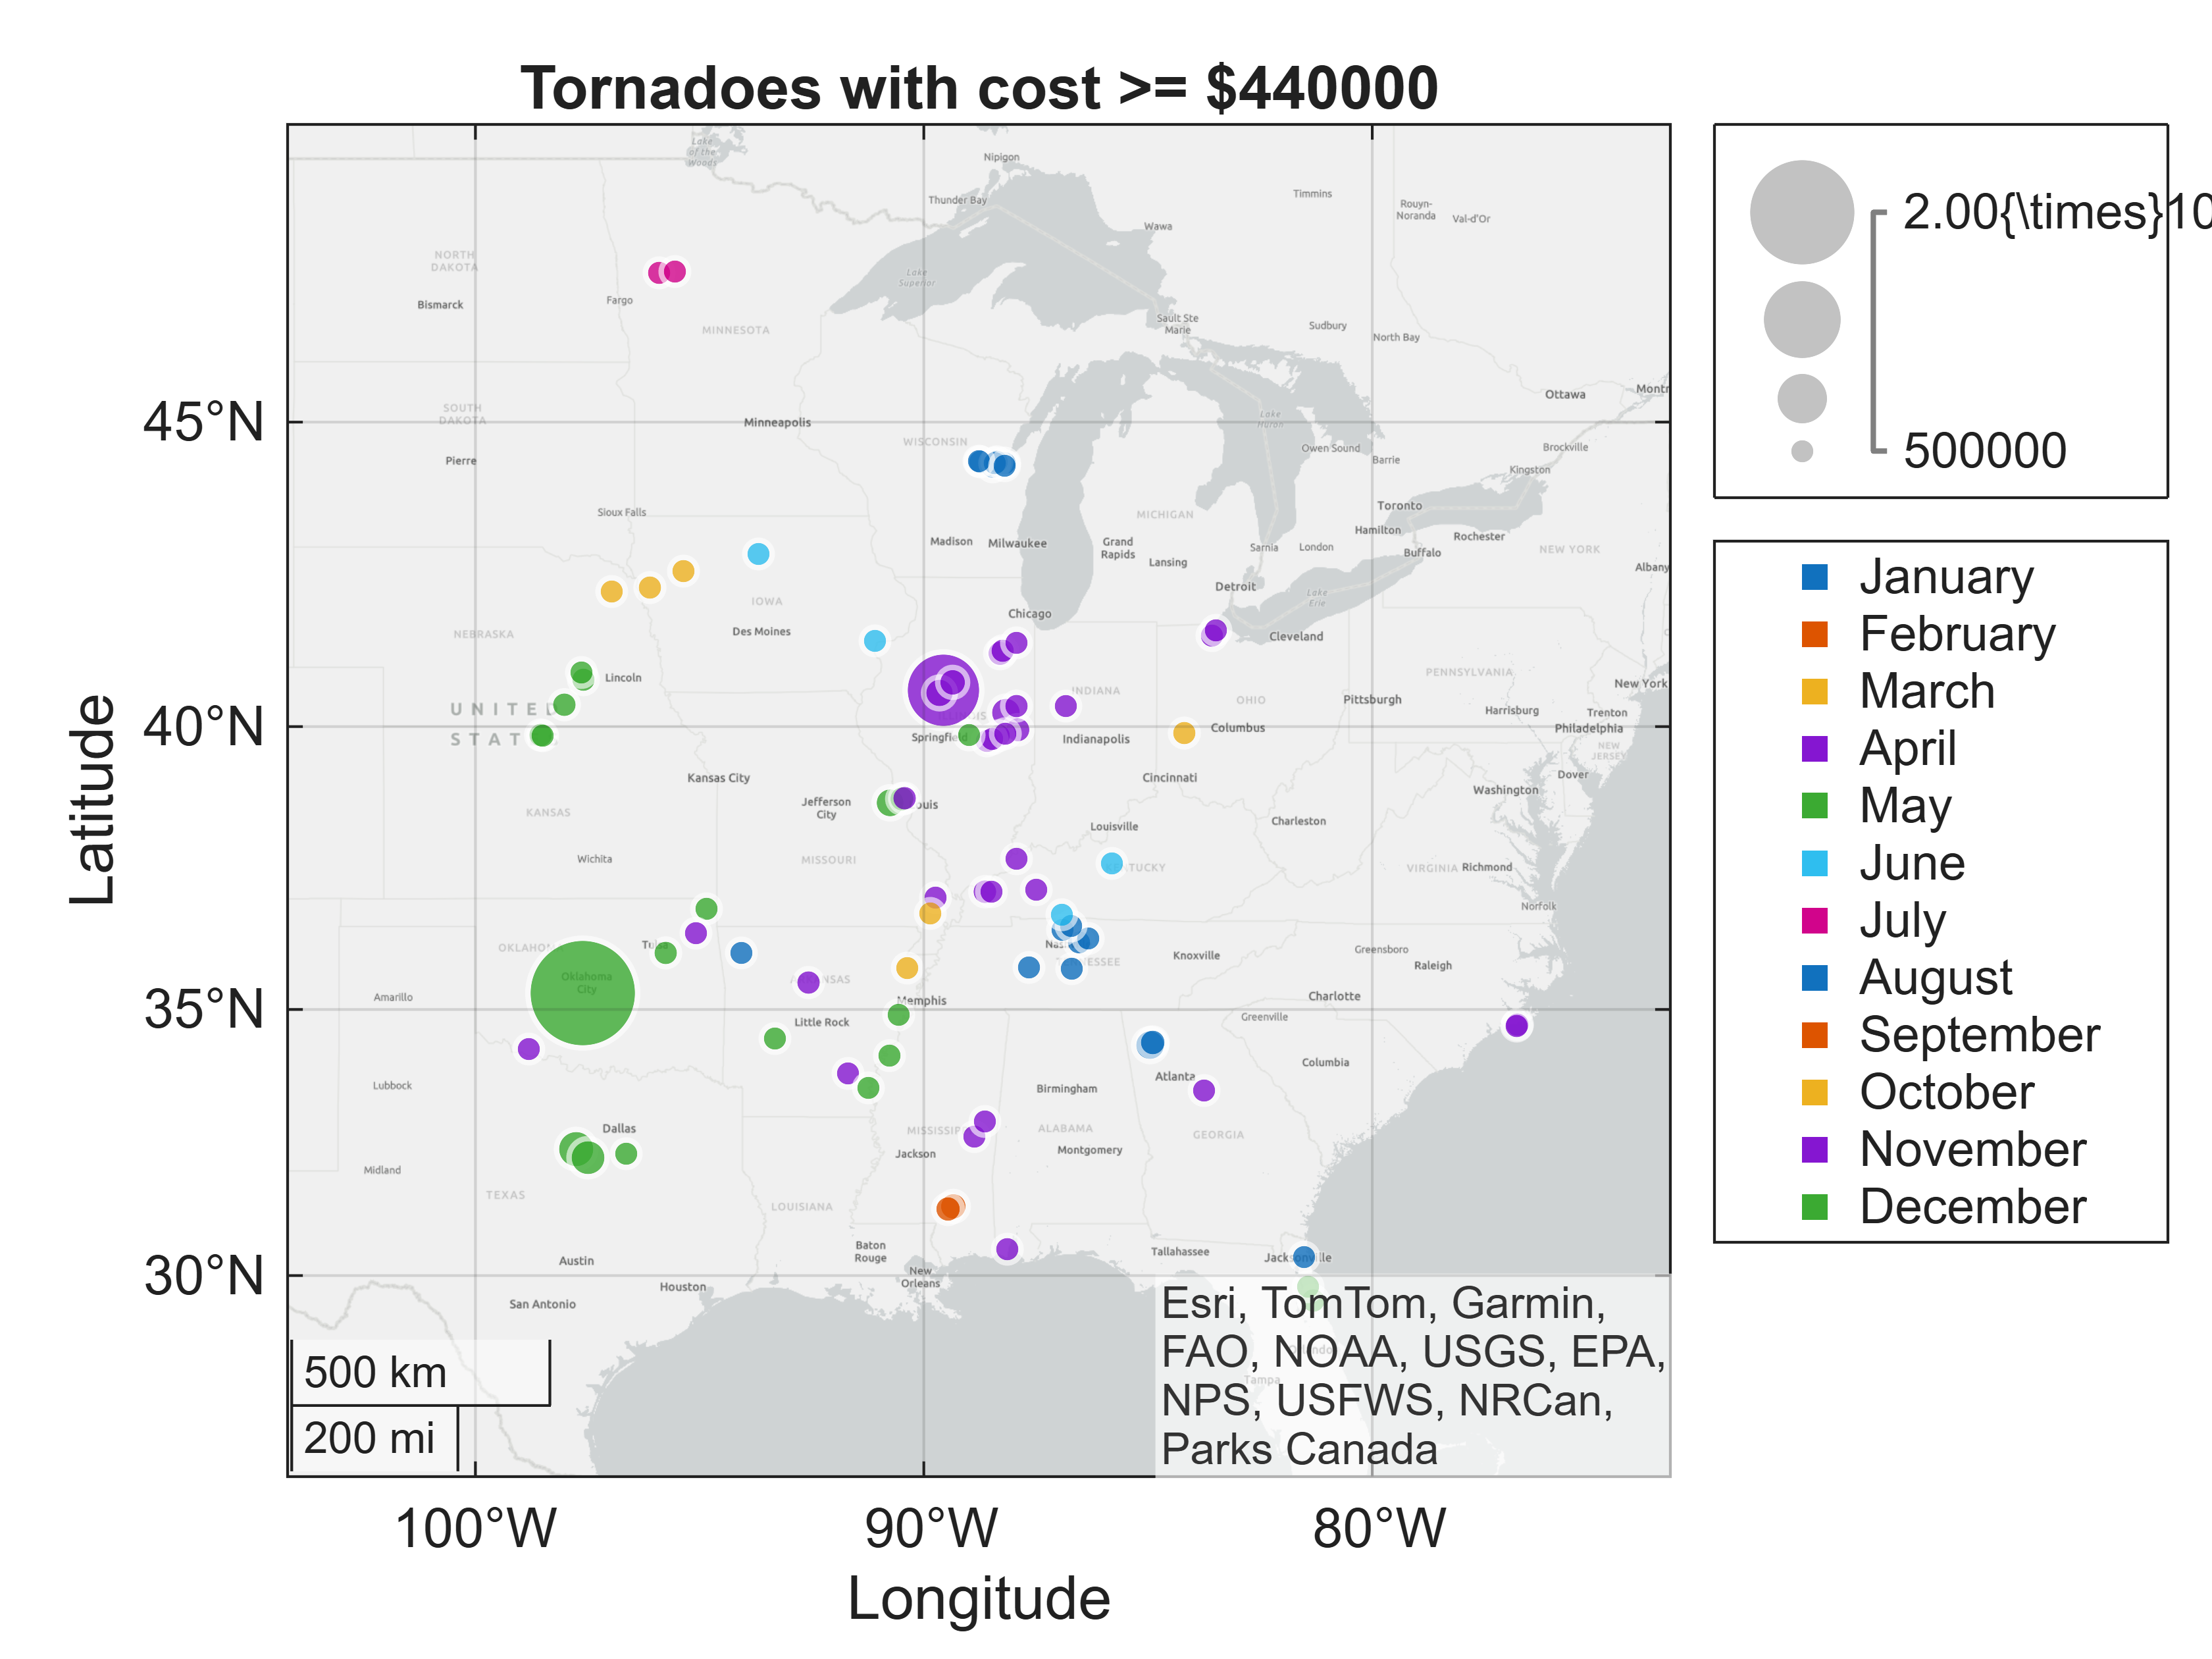

In [5]:
% Select tornadoes above a damage threshold set by the slider
tornadoes = events(events.Event_Type == "Tornado" & events.Total_Damage >= minDamage, :);
% Plot the results on a map
geobubble(tornadoes.Begin_Lat,tornadoes.Begin_Lon,tornadoes.Total_Damage, tornadoes.Month);
title("Tornadoes with cost >= $" + minDamage)
geolimits([26.0 49.5],[-104.2 -73.4])


**Description of code above**

-  A new table with only tornadoes above the damage threshold is created.
-  The location of tornadoes is plotted.
<a id="H_99E00D65"></a>

### Plot tornadoes for a given month
<a id="H_73B1FBBD"></a>

Below is a drop\-down menu to explore the location of tornadoes for a given month. Observe how the number and location of tornadoes varies throughout the year. All tornadoes are treated as equal regardless of damage caused.

1.  Run this section.
2. A new figure is created. Use the Minus icon in the plot tools to zoom out until the region visible is similar to the figure in the previous section.
3. Click **Update Code**. This will set the axes limits so they don't change when you select a different month.
4. Select `May` from the drop\-down menu.
5. Explore other months.

In [6]:
eventMonth = "April";


There is no need to edit the code below. The code recreates the tornadoes table so that all tornadoes are included. By the end of Module 3 you'll be able to select any Event\_Type and create a new table of just that category.



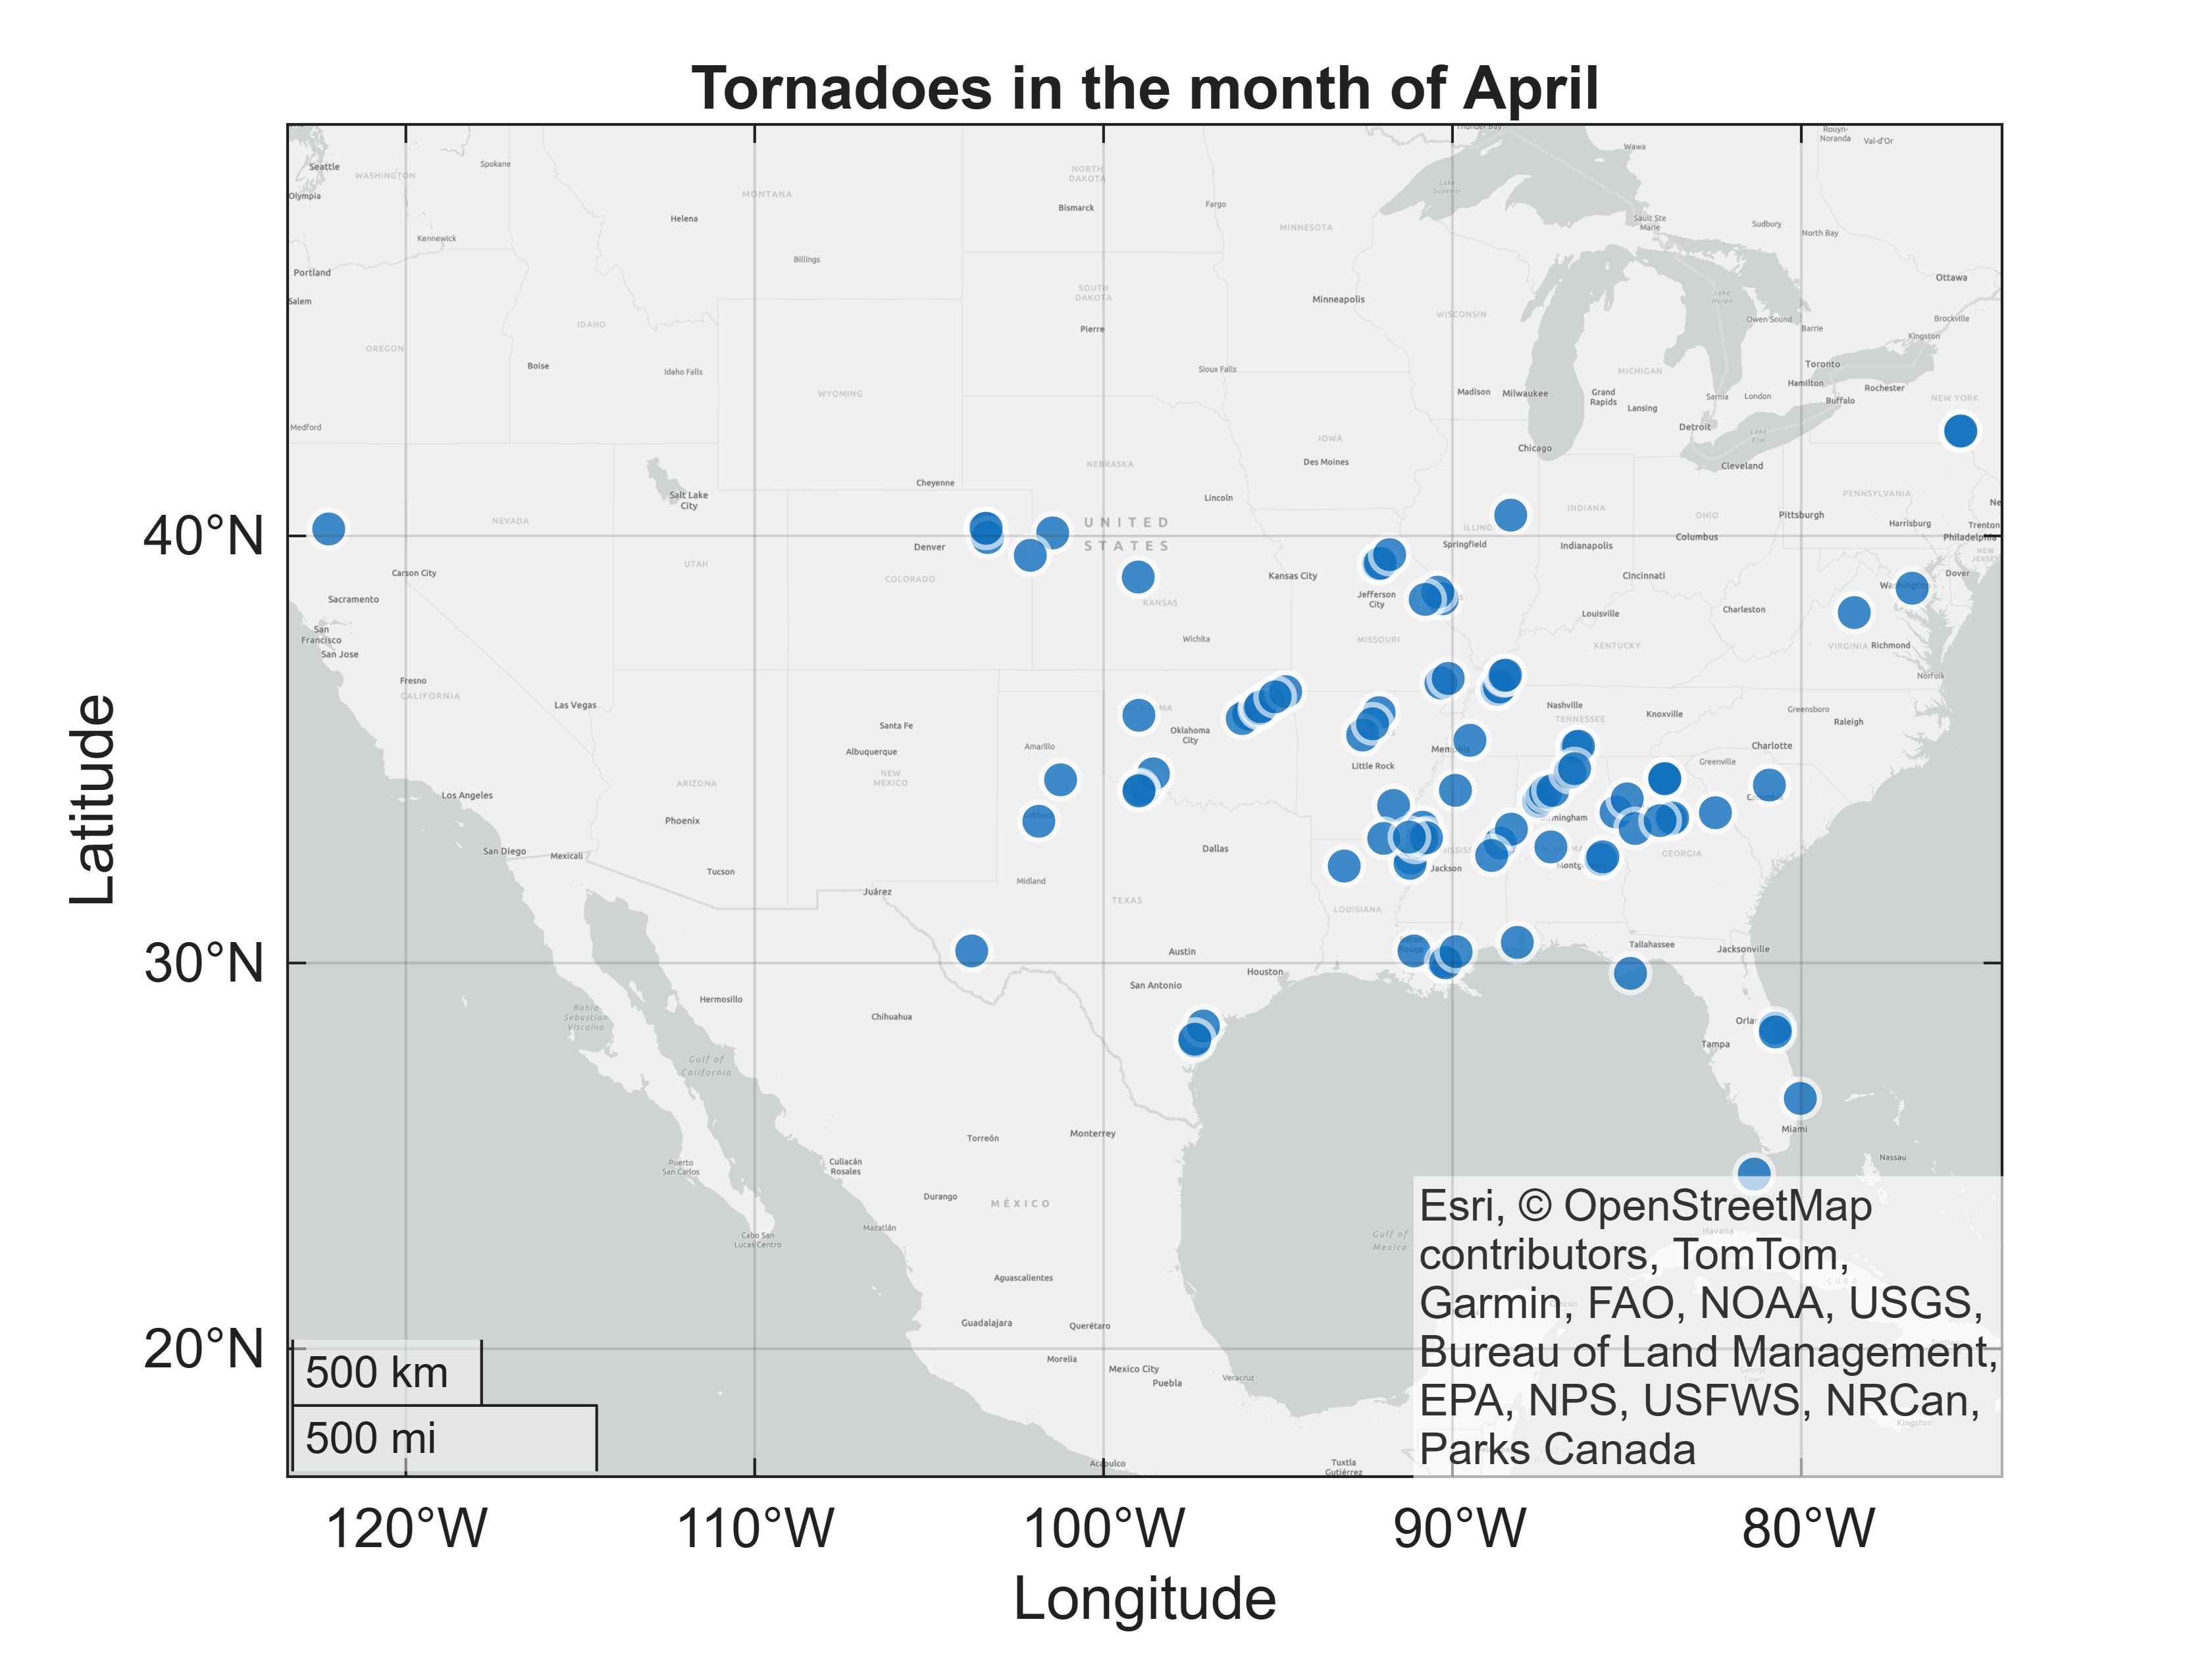

TypeError: Cannot read properties of undefined (reading 'id')
TypeError: Cannot read properties of undefined (reading 'id')
TypeError: Cannot read properties of undefined (reading 'id')
TypeError: Cannot read properties of undefined (reading 'id')

In [7]:
tornadoes = events(events.Event_Type == "Tornado", :);
tornadoes = tornadoes(tornadoes.Month == eventMonth, :);
geobubble(tornadoes.Begin_Lat,tornadoes.Begin_Lon);
title("Tornadoes in the month of " + eventMonth)


<a id="H_2FB427B5"></a>

## Part 3: Calculate Group Summary Statistics
<a id="H_029963C7"></a>

### Create a histogram of tornado events
<a id="H_7DB1E095"></a>

In the section above, you may have noticed that some months have more tornadoes than others. This section creates a histogram to show the number of tornadoes by month.

-  Run this section. Which month has the most tornadoes? Is there a tornado season?

In [8]:
tornadoes = events(events.Event_Type == "Tornado",:)


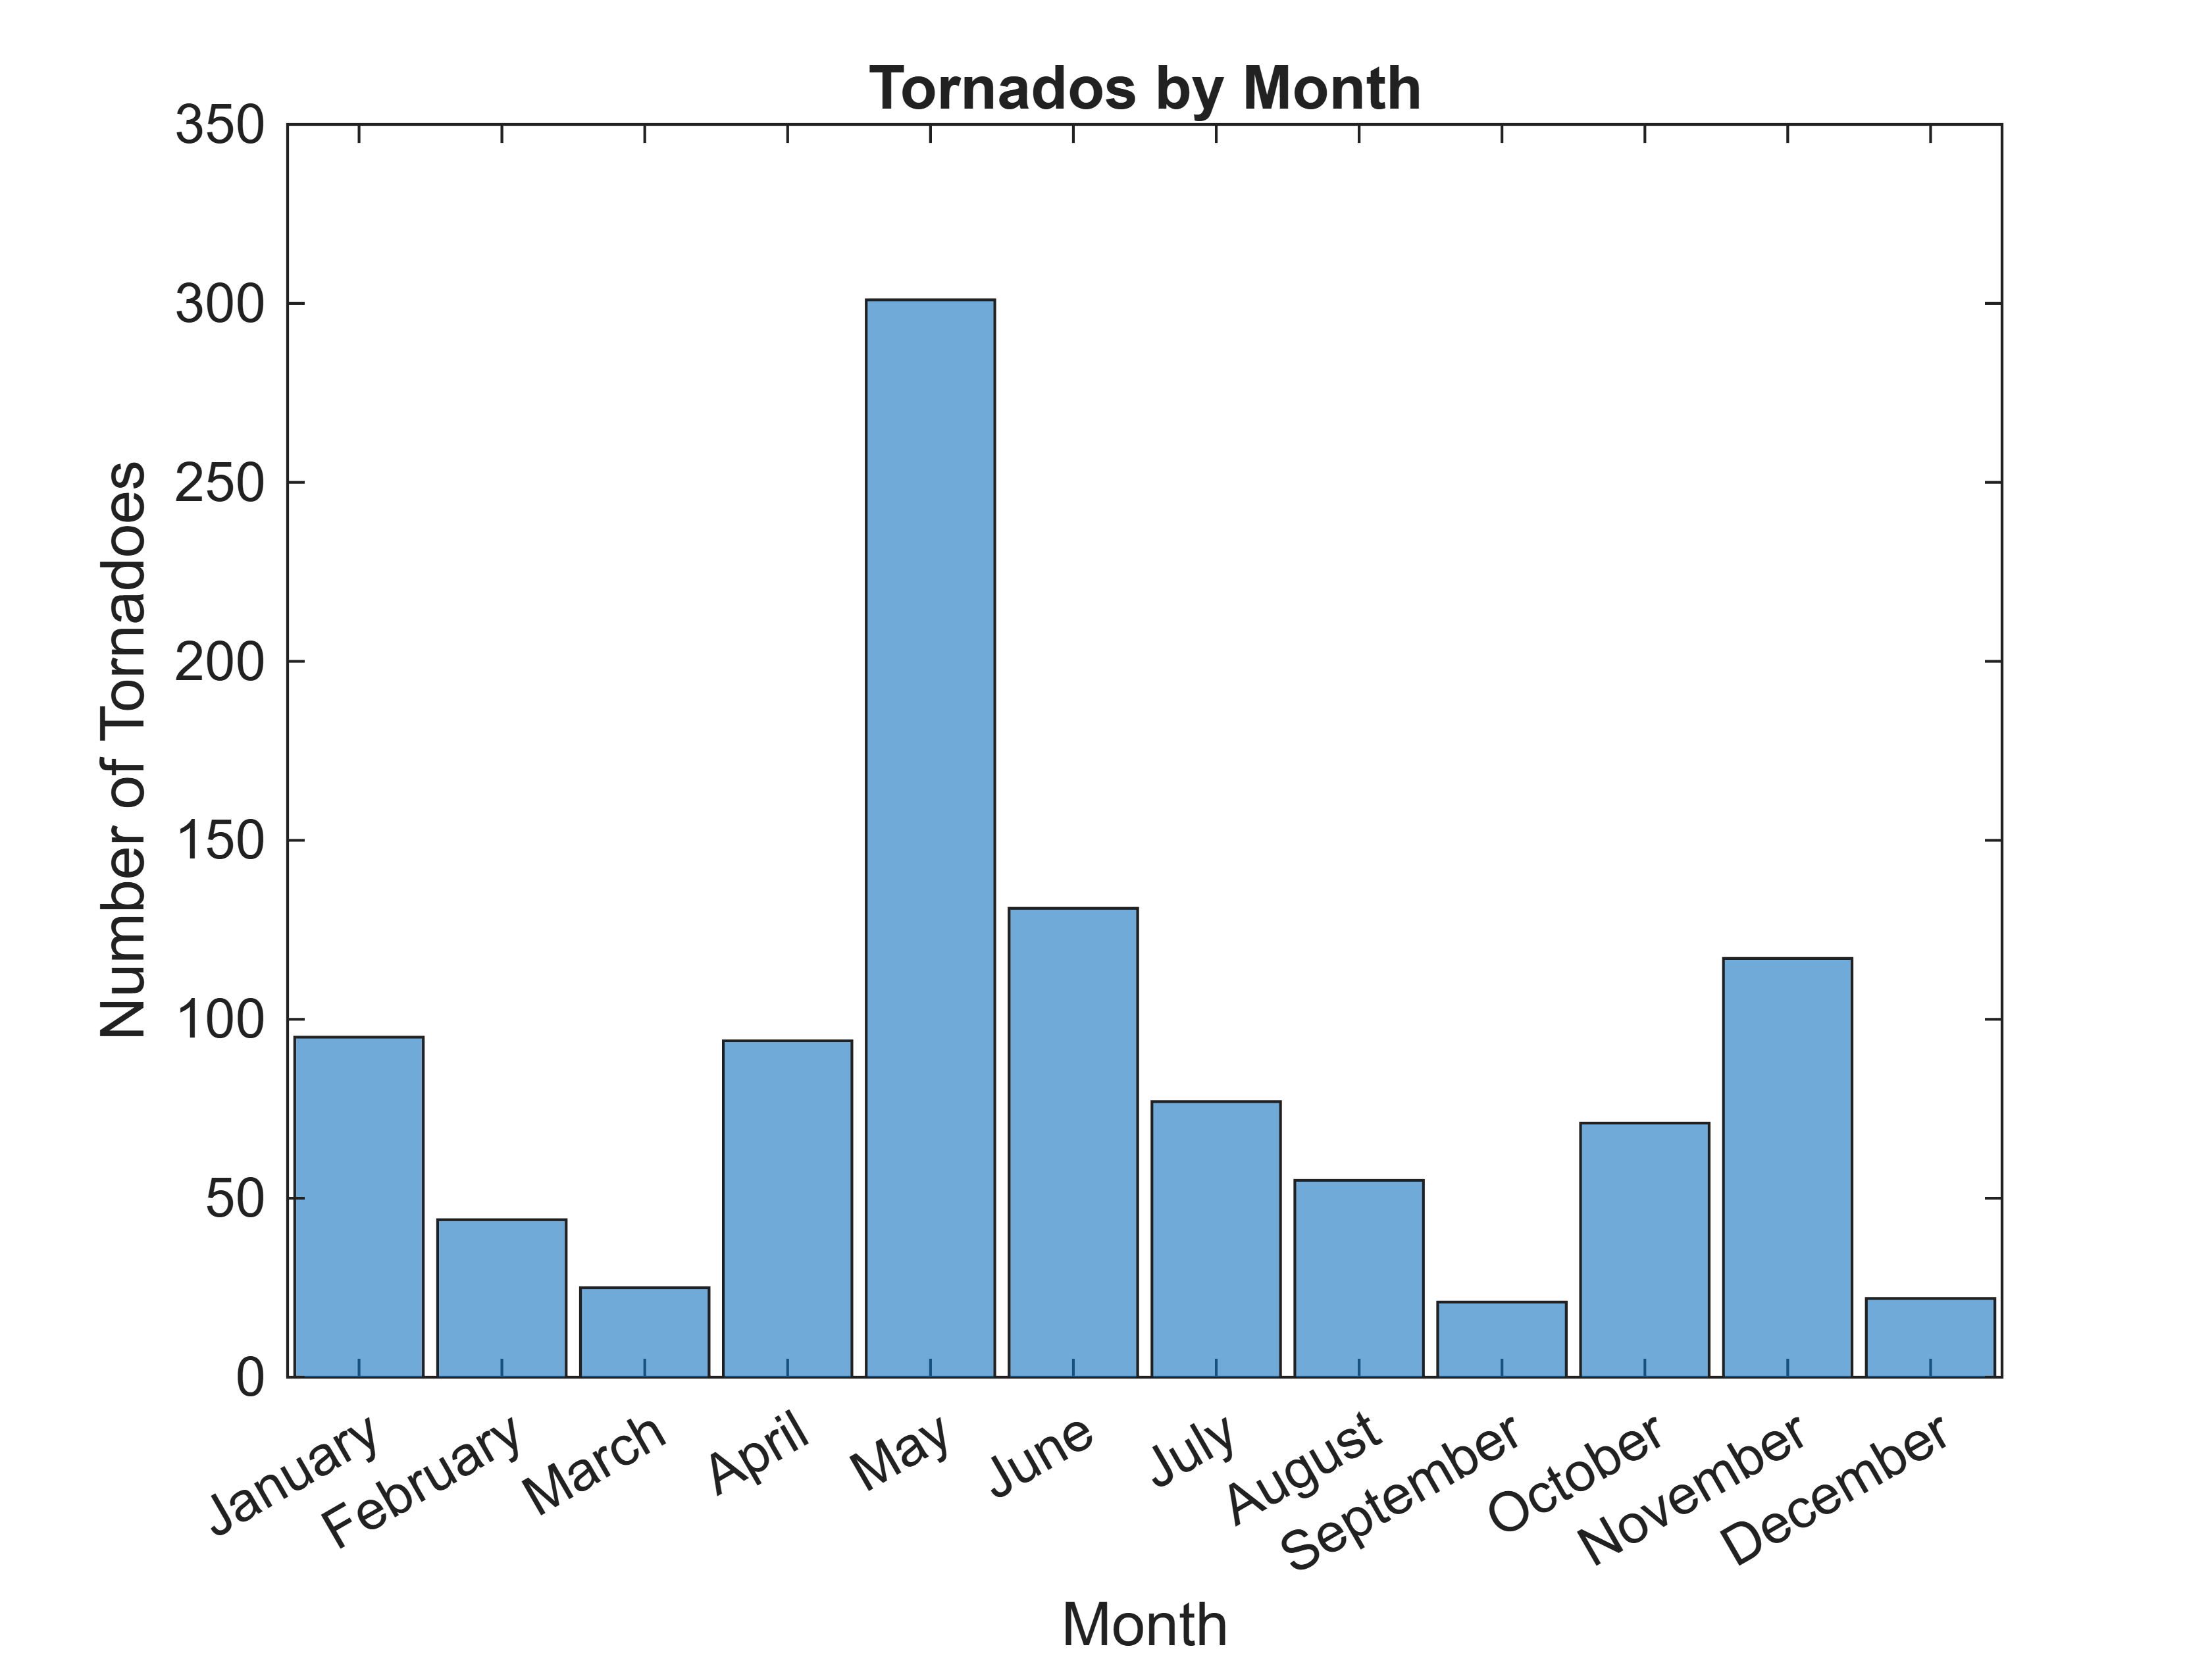

TypeError: Cannot read properties of undefined (reading 'id')
TypeError: Cannot read properties of undefined (reading 'id')
TypeError: Cannot read properties of undefined (reading 'id')
TypeError: Cannot read properties of undefined (reading 'id')

In [9]:
histogram(tornadoes.Month)
title("Tornados by Month")
xlabel("Month")
ylabel("Number of Tornadoes")


<a id="H_59976D16"></a>

### Total damage by month

Looking at the histogram, the month of May had far more tornadoes than any other month. Now examine the damage caused by these tornadoes.

1.  Run this section. A table showing the number of tornadoes for each month and the selected statistic is created. A bar plot shows the results.
2. Use the drop\-down menu to change the statistic calculated for each month.

In [10]:
stat = "mean";


There is no need to edit the code below. In Module 4 you'll learn how to calculate statistics on groups in your data. Here, the code calculates the chosen statistic for each month on the `Total_Damage` variable in the table.


In [11]:
tornadoes = events(events.Event_Type == "Tornado",:);
% Group tornadoes by month and calculate the selected stat
cost = groupsummary(tornadoes, "Month", stat, "Total_Damage")


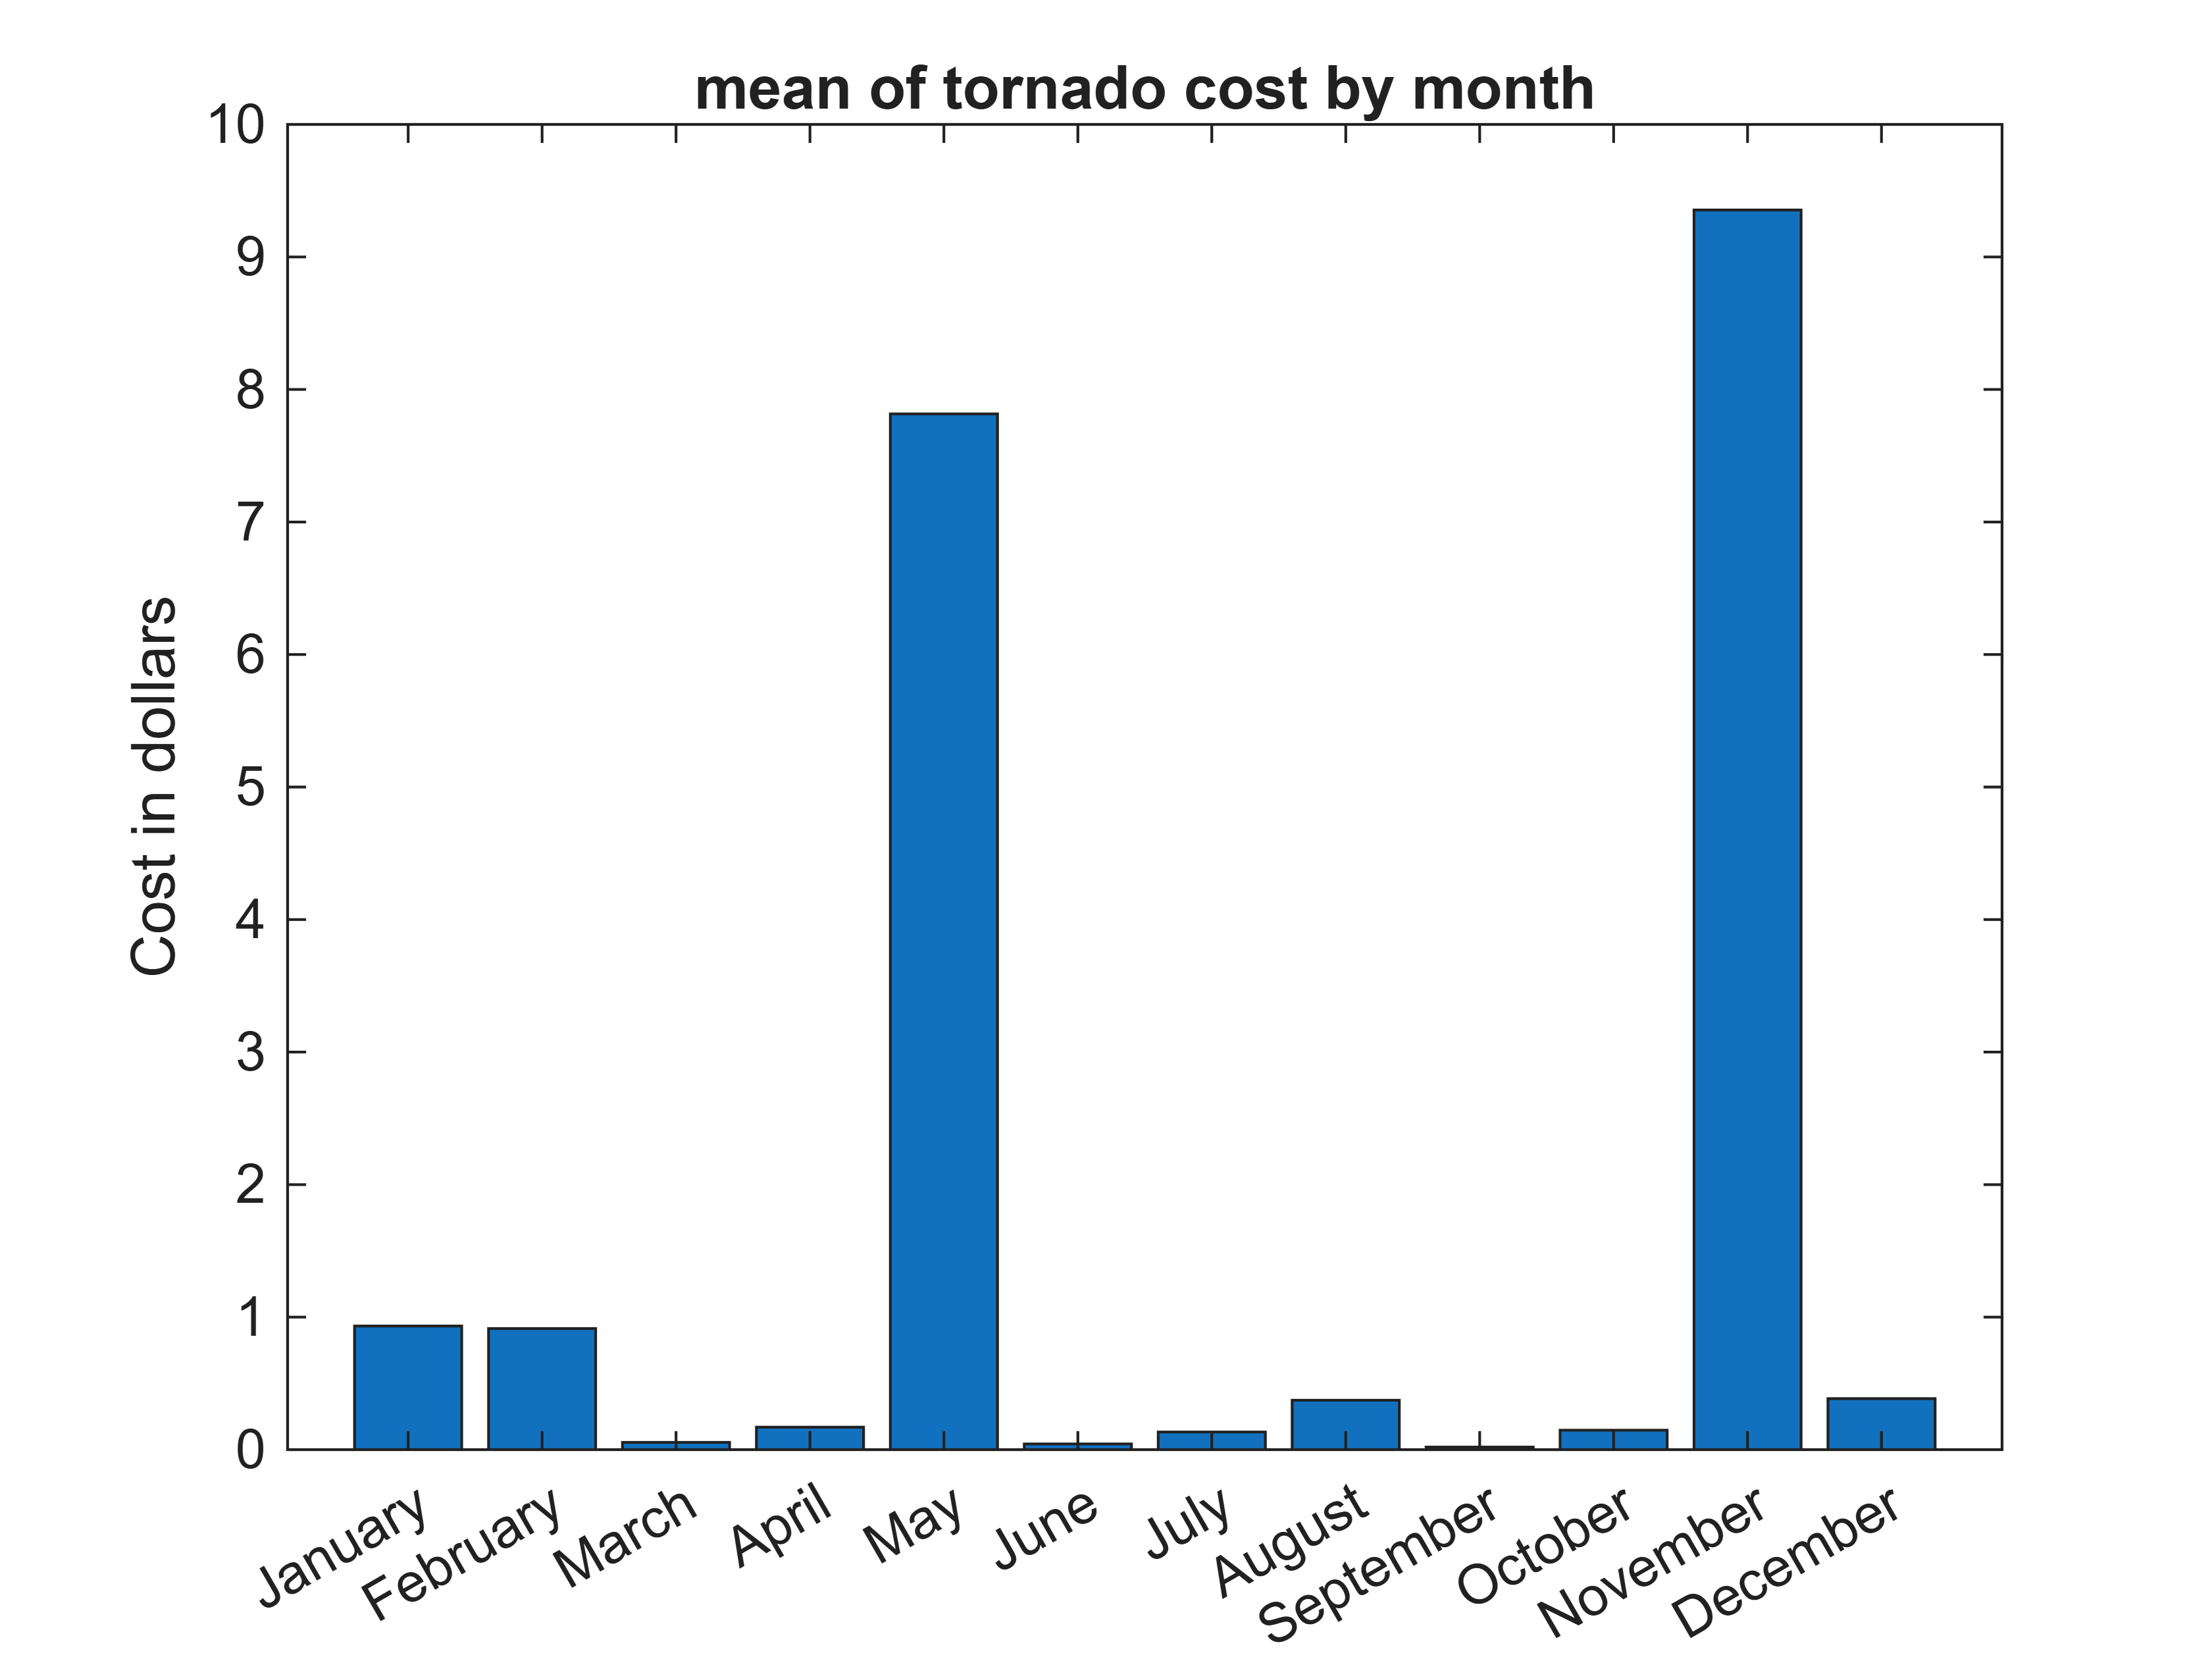

TypeError: Cannot read properties of undefined (reading 'id')
TypeError: Cannot read properties of undefined (reading 'id')
TypeError: Cannot read properties of undefined (reading 'id')
TypeError: Cannot read properties of undefined (reading 'id')

In [12]:
% View the results using a bar chart
bar(cost.Month, cost{:, end})
title(stat + " of tornado cost by month")
ylabel("Cost in dollars")


<a id="H_6873A476"></a>

**Description of code above**


The `groupsummary` function returns a table. The table includes the number of events in each group and the statistic for the selected variable. In this example, the data is grouped by the `Month` variable. The statistic selected in the drop\-down menu is applied to the `Total_Damage` variable. The result is added to the last column of the table. A bar plot is used to visualize the result.

<a id="H_74316A4C"></a>

## Closing Remarks

Notice how quickly creating a variety of visualizations provided an overview of lots of data. What have you learned about tornadoes in the United States in 2013? Hopefully you gained a feel for the data. This is important later when trying to evaluate predictive models. Without a feel for the data, it's difficult to look at the output of a complex model and determine if the results are reasonable.

<a id="H_E0B13F0C"></a>

For now, you can state that in 2013:

-  The frequency of tornadoes was less during the winter months than late spring/early summer
-  Winter tornadoes tend to be in the southern United States
-  An extremely damaging tornado occurred in November

Maybe you have a lot more questions. For example, what states are most affected? What do the results look like for different years? This script just looks at tornadoes, what about all the other storm events? The fun, and challenging, aspect of having lots of data is trying to explore all the possible questions and relationships. By the end of this course you'll have the skills to answer these questions and more.


 **Hint.** You can look at other years by changing the year in the filename in the first line of code!

<a id="H_E6630148"></a>
